In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')


'pt_BR.UTF-8'

In [5]:
# Importar base de dados e tratamentos
base_dados_df = pd.read_csv("Magazine Luiza MGLU3 - Histórico  InfoMoney.csv")

# Criando nova data frame somente com as colunas que desejo trabalhar
arquivo_df = base_dados_df[['DATA', 'FECHAMENTO']].copy()

# Alterando o nome das colunas
arquivo_df.columns = ['Data', 'Fechamento']

# Alterando a ',' para '.' dos números, e convertendo eles para float.
arquivo_df['Fechamento'] = arquivo_df['Fechamento'].str.replace(',', '.').astype(float) 


In [6]:
# Salvar o arquivo formatado
arquivo_df.to_csv('Arquivo_analisado.csv')


In [11]:
# Maior valor no período
valorMaximo = arquivo_df['Fechamento'].max()
maxFormatado = locale.currency(valorMaximo, grouping=True)
dataMaximo = arquivo_df.loc[arquivo_df['Fechamento'].idxmax(), 'Data']
print(f"Maior valor no periodo:\nDia: {dataMaximo}\n{maxFormatado}\n")

# Menor valor no período
valorMinimo = arquivo_df['Fechamento'].min()
minFormatado = locale.currency(valorMinimo, grouping=True)
dataMinimo = arquivo_df.loc[arquivo_df['Fechamento'].idxmin(), 'Data']
print(f"Menor valor no periodo:\nDia: {dataMinimo}\n{minFormatado}\n")

# Valor médio no período
valorMedio = arquivo_df['Fechamento'].mean()
mediaFormatado = locale.currency(valorMedio, grouping=True)
print(f"Valor médio: \n{mediaFormatado}")


Maior valor no periodo:
Dia: 15/07/2024
R$ 14,33

Menor valor no periodo:
Dia: 01/11/2024
R$ 8,86

Valor médio: 
R$ 11,24


In [ ]:
num_acoes = 2000
dataAquisicao = arquivo_df.loc[69]['Data']
preco_compra = arquivo_df.loc[69]['Fechamento']

dataVenda = arquivo_df.loc[9]['Data']
preco_venda = arquivo_df.loc[9]['Fechamento']

valorInvestido = num_acoes * preco_compra
valorVenda = num_acoes * preco_venda

valorFinal = valorVenda - valorInvestido

print(f'Valor de compra das ações: {locale.currency(valorInvestido, grouping=True)}\n')
print(f'Valor de venda das ações: {locale.currency(valorVenda, grouping=True)}')
print(f"\nO investidor teve {"lucro" if valorFinal > 0 else "prejuizo"} de {locale.currency(valorFinal, grouping=True)}")

Valor de compra das ações: R$ 26.580,00

Valor de venda das ações: R$ 19.960,00

O investidor teve prejuizo de R$ -6.620,00


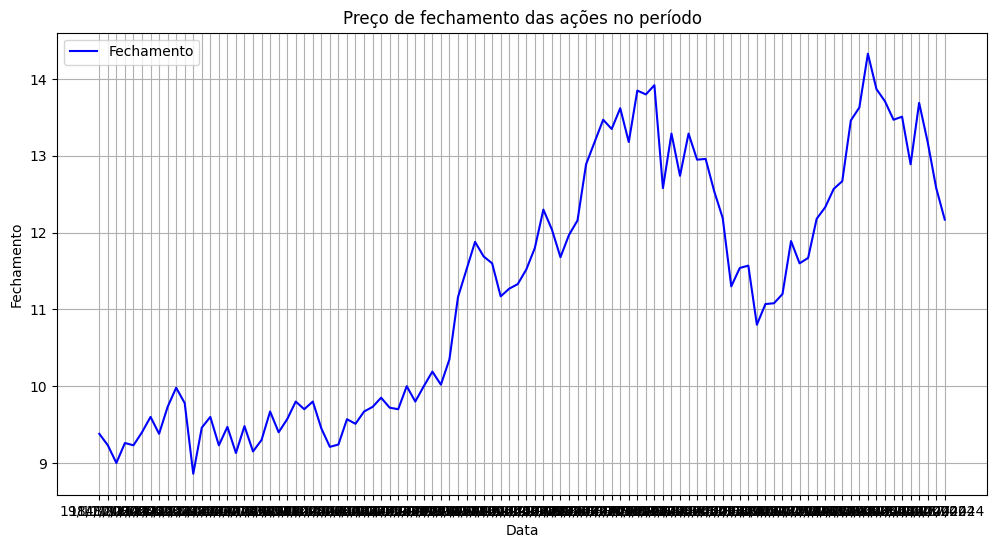

In [9]:

plt.figure(figsize=(12,6))
plt.plot(arquivo_df['Data'], arquivo_df["Fechamento"], label='Fechamento', color='blue')
plt.title('Preço de fechamento das ações no período')
plt.xlabel('Data')
plt.ylabel("Fechamento")
plt.legend()
plt.grid(True)
plt.show()